In [28]:
import pandas as pd
import numpy as np

# Lecture des données
## Charger les données ou les lire directement en précisant le chemin
path=""
spotify=pd.read_csv(path+"spotify-extr.txt",sep=" ",header=0)
# Vérification du contenu
spotify.head()

,valence,year,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,pop.class
161704,0.647,1975,0.4490,0.376,298840,0.827,0.007880,B,0.466,-7.604,1,25,0.3990,170.475,C
168077,0.150,2008,0.8990,0.508,236800,0.169,0.000011,Ab,0.136,-11.332,1,42,0.0553,107.477,B
35922,0.423,2007,0.0185,0.470,301093,0.878,0.083900,B,0.276,-5.576,0,65,0.0377,150.093,A
135823,0.302,1995,0.0384,0.176,142200,0.980,0.552000,B,0.237,-3.154,1,36,0.0721,172.566,C
165395,0.828,1994,0.5310,0.705,187800,0.625,0.000008,G,0.348,-11.963,0,38,0.0639,97.831,C


In [29]:
spotify["key"]=pd.Categorical(spotify["key"],ordered=False)
spotify["mode"]=pd.Categorical(spotify["mode"],ordered=False)
spotify["pop.class"]=pd.Categorical(spotify["pop.class"],ordered=False)
#spotify["pop.class"]=pd.DataFrame(spotify["pop.class"], dtype=float)
spotify.dtypes

valence              float64
year                   int64
acousticness         float64
danceability         float64
duration               int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
mode                category
popularity             int64
speechiness          float64
tempo                float64
pop.class           category
dtype: object

In [30]:
spotify.describe()

,valence,year,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.532815,1977.026200,0.495719,0.540029,2.272151e+05,0.487500,0.164947,0.204063,-11.437683,31.558100,0.101815,116.865750
std,0.262431,26.000068,0.377681,0.176193,1.124568e+05,0.267729,0.313327,0.173221,5.787993,21.915904,0.168111,30.969039
min,0.000000,1921.000000,0.000000,0.000000,5.991000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,0.324000,1956.000000,0.092675,0.417000,1.690670e+05,0.262000,0.000000,0.097800,-14.557000,11.000000,0.035000,93.564500
50%,0.543000,1978.000000,0.504000,0.550000,2.065295e+05,0.476000,0.000174,0.135000,-10.552500,33.000000,0.045400,114.437500
75%,0.751000,1999.000000,0.889250,0.671000,2.597330e+05,0.708000,0.087100,0.256000,-7.115500,48.250000,0.078600,135.470000
max,0.993000,2020.000000,0.996000,0.988000,2.703227e+06,1.000000,1.000000,0.991000,1.342000,93.000000,0.969000,214.419000


## Exploration

###  unidim

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

In [35]:
#plt.plot(spotify["duration"].hist())
#plt.show()

In [12]:
from math import sqrt, log
spotify["lduration"]=spotify["duration"].map(lambda x: log(x))
spotify["sliveness"]=spotify["liveness"].map(lambda x: sqrt(x))


del spotify["liveness"]
del spotify["duration"]



In [13]:
spotify.head()

,valence,year,acousticness,danceability,energy,instrumentalness,key,loudness,mode,popularity,speechiness,tempo,pop.class,lduration,sliveness
161704,0.647,1975,0.4490,0.376,0.827,0.007880,B,-7.604,1,25,0.3990,170.475,C,12.607664,0.682642
168077,0.150,2008,0.8990,0.508,0.169,0.000011,Ab,-11.332,1,42,0.0553,107.477,B,12.374971,0.368782
35922,0.423,2007,0.0185,0.470,0.878,0.083900,B,-5.576,0,65,0.0377,150.093,A,12.615174,0.525357
135823,0.302,1995,0.0384,0.176,0.980,0.552000,B,-3.154,1,36,0.0721,172.566,C,11.864990,0.486826
165395,0.828,1994,0.5310,0.705,0.625,0.000008,G,-11.963,0,38,0.0639,97.831,C,12.143133,0.589915


### Multidim

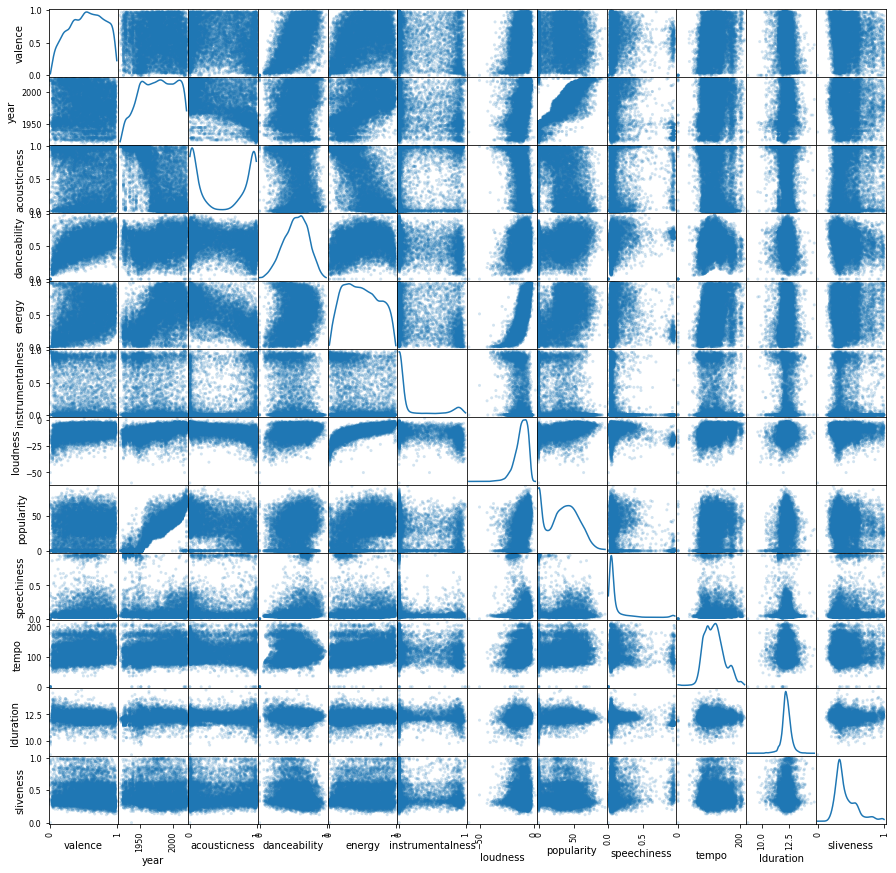

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(spotify[["valence","year","acousticness","danceability","energy","instrumentalness","loudness","popularity","speechiness","tempo","lduration","sliveness"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X=scale(spotify[["valence","year","acousticness","danceability","energy","instrumentalness","loudness","speechiness","tempo","lduration","sliveness"]])

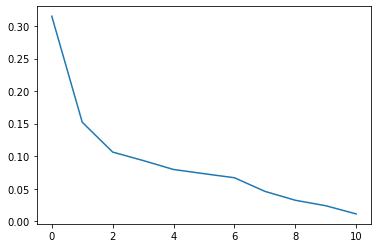

In [9]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

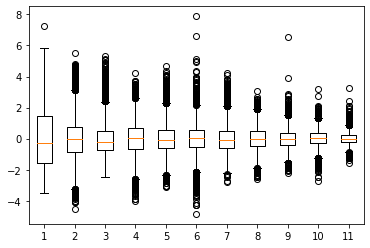

In [10]:
plt.boxplot(C[:,0:20])
plt.show()

In [11]:
col=['r','b','g','k']
colvect=[]
for i in spotify["pop.class"]:
    if i=='A' :
        colvect.append(0)
    elif i=='B':
        colvect.append(1)
    elif i=='C':
        colvect.append(2)
    else:
        colvect.append(3)

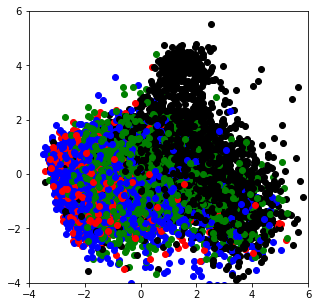

In [12]:
plt.figure(figsize=(5,5))
a=0
for i, j, nom in zip(C[:,0], C[:,1], colvect):
    color = col[nom]
    plt.plot(i, j, "o",color=color)
plt.axis((-4,6,-4,6))  
plt.show()

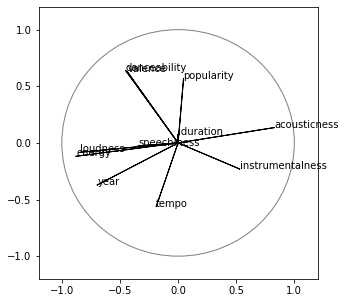

In [13]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2,spotify[["valence","year","acousticness","danceability",
                                            "energy","instrumentalness","loudness","popularity",
                                            "speechiness","tempo","lduration","sliveness"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

## séparation train test

In [14]:
spotify.head()

,valence,year,acousticness,danceability,energy,instrumentalness,key,loudness,mode,popularity,speechiness,tempo,pop.class,lduration,sliveness
161704,0.647,1975,0.4490,0.376,0.827,0.007880,B,-7.604,1,25,0.3990,170.475,C,12.607664,0.682642
168077,0.150,2008,0.8990,0.508,0.169,0.000011,Ab,-11.332,1,42,0.0553,107.477,B,12.374971,0.368782
35922,0.423,2007,0.0185,0.470,0.878,0.083900,B,-5.576,0,65,0.0377,150.093,A,12.615174,0.525357
135823,0.302,1995,0.0384,0.176,0.980,0.552000,B,-3.154,1,36,0.0721,172.566,C,11.864990,0.486826
165395,0.828,1994,0.5310,0.705,0.625,0.000008,G,-11.963,0,38,0.0639,97.831,C,12.143133,0.589915


In [15]:
spotifyDum=pd.get_dummies(spotify[["key","mode"]])
del spotifyDum["mode_0"]
spotifyQuant=spotify[["valence","year","acousticness","danceability",
                                            "energy","instrumentalness","loudness","popularity",
                                            "speechiness","tempo","lduration","sliveness"]]
dfC=pd.concat([spotifyDum,spotifyQuant],axis=1)
dfC.head()

,key_A,key_Ab,key_B,key_Bb,key_C,key_D,key_Db,key_E,key_Eb,key_F,...,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,tempo,lduration,sliveness
161704,0,0,1,0,0,0,0,0,0,0,...,0.4490,0.376,0.827,0.007880,-7.604,25,0.3990,170.475,12.607664,0.682642
168077,0,1,0,0,0,0,0,0,0,0,...,0.8990,0.508,0.169,0.000011,-11.332,42,0.0553,107.477,12.374971,0.368782
35922,0,0,1,0,0,0,0,0,0,0,...,0.0185,0.470,0.878,0.083900,-5.576,65,0.0377,150.093,12.615174,0.525357
135823,0,0,1,0,0,0,0,0,0,0,...,0.0384,0.176,0.980,0.552000,-3.154,36,0.0721,172.566,11.864990,0.486826
165395,0,0,0,0,0,0,0,0,0,0,...,0.5310,0.705,0.625,0.000008,-11.963,38,0.0639,97.831,12.143133,0.589915


In [16]:
# variable à expliquer qualtitative
Yb=spotify["pop.class"]
# variable à expliquer réelle
Yr=spotify["popularity"]

In [17]:
spotify.shape

(10000, 15)

In [18]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Yb_train,Yb_test=train_test_split(dfC,Yb,test_size=2000,random_state=11)
X_train,X_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=2000,random_state=11)

In [19]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

## Réseau de Neuronnes

In [20]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV

In [69]:
#en classification
param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]
nnet= GridSearchCV(MLPClassifier(max_iter=200),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(Xr_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.009125, Meilleur paramètre = {'hidden_layer_sizes': (5,)}


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [70]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(Xr_test,Yb_test)

0.013499999999999956

In [71]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(Xr_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
print(table)
print(np.mean(y_chap==Yb_test))

pop.class    A    B    C    D
row_0                        
A          179    1    0    0
B           11  571    2    0
C            0    0  572   10
D            0    0    3  651
0.9865


In [72]:
#En régrassion
param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]
nnet= GridSearchCV(MLPRegressor(max_iter=200),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(Xr_train, Yr_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.001328, Meilleur paramètre = {'hidden_layer_sizes': (8,)}


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(Xr_test,Yr_test)

0.003440535767508801

In [74]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(Xr_test)
y_chap_class=[]
for i in y_chap:
    if i < 20 :
        y_chap_class.append('D')
    elif i >20 and i < 40:
        y_chap_class.append('C')
    elif i >40 and i < 60:
        y_chap_class.append('B')
    else:
        y_chap_class.append('A')
        

In [75]:
# matrice de confusion
table=pd.crosstab(np.array(y_chap_class),Yb_test)
print(table)
print(np.mean(y_chap_class==Yb_test))

pop.class    A    B    C    D
row_0                        
A          189    9    0    0
B            1  560   13    0
C            0    3  553   15
D            0    0   11  646
0.974


## Tensorflow/keras

In [21]:
import seaborn as sb
sb.set_style("whitegrid")
import numpy as np
from functools import reduce

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

n_features = 25
n_classes = 4
n_hidden = 8

In [23]:
newY_train=[]
for i in Yb_train:
    if i=='A':
        newY_train.append(1)
    elif i=='B':
        newY_train.append(2)
    elif i=='C':
        newY_train.append(3)
    else:
        newY_train.append(4)
newY_train=np.array(newY_train)

In [24]:
newY_test=[]
for i in Yb_test:
    if i=='A':
        newY_test.append(1)
    elif i=='B':
        newY_test.append(2)
    elif i=='C':
        newY_test.append(3)
    else:
        newY_test.append(4)
newY_test=np.array(newY_test)

In [25]:
newY_train

array([3, 3, 2, ..., 1, 4, 3])

In [26]:
keras_model = Sequential()
keras_model.add(Dense(n_hidden, input_dim=n_features, activation='sigmoid'))
keras_model.add(Dense(n_classes, activation='softmax'))

keras_model.compile(optimizer=SGD(lr=3),
                    loss='categorical_crossentropy', metrics=['accuracy'])

history = keras_model.fit(X_train, to_categorical(newY_train), epochs=15, batch_size=32, validation_data = (X_test, to_categorical(newY_test)))

Epoch 1/15


ValueError: in user code:

    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 5) and (32, 4) are incompatible
